In [9]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [20]:
def generate_ar_process(lags, coeffs, length):
    #coeff are same as Fi in the equation
    
    #sort coeffs in numpy array
    coeffs = np.array(coeffs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        
        #get previous values of the series reversed
        prev_vals = series[-lags:][::-1]
        
        #get new values of the time series
        new_val = np.sum(np.array(prev_vals)*coeffs) + np.random.normal()
        
        series.append(new_val)
    return series

In [21]:
def perform_adf_test(series):
    result = adfuller(series)
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

### AR(1) Process

### Stationary

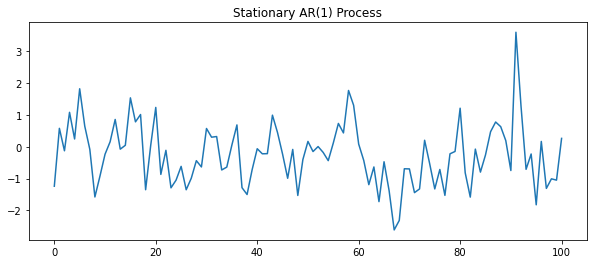

In [22]:
ar_1_process = generate_ar_process(1,[.5],100)
plt.figure(figsize = (10,4))
plt.title('Stationary AR(1) Process')
plt.plot(ar_1_process)

In [23]:
perform_adf_test(ar_1_process)

ADF statistic: -6.832471981029332
p-value: 1.8784122930000612e-09


### Non-stationary

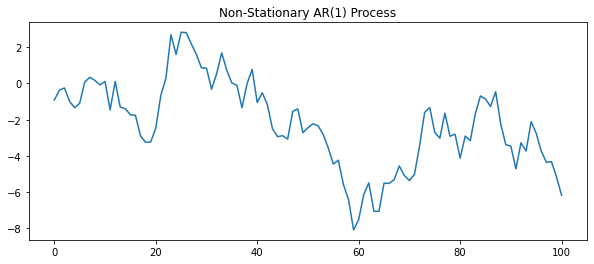

In [24]:
ar_1_process = generate_ar_process(1,[1],100) # here Fi is 1 which means we have a unit root
plt.figure(figsize = (10,4))
plt.title('Non-Stationary AR(1) Process')
plt.plot(ar_1_process)

In [25]:
perform_adf_test(ar_1_process)

ADF statistic: -1.7375309158694252
p-value: 0.4118864771678848


* From the p-value we can tell that this series is not stationary

### AR(2) Process

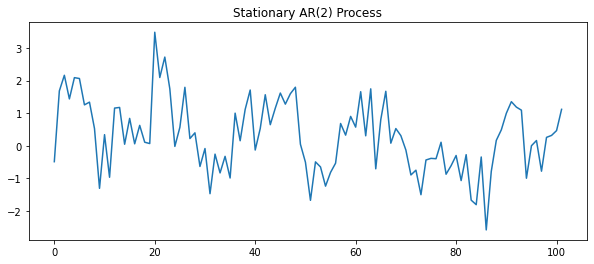

In [29]:
# the coefficients do not sum up to 1 -> statinary, no unit roots
ar_2_process = generate_ar_process(2,[.5,.3],100) 
plt.figure(figsize = (10,4))
plt.title('Stationary AR(2) Process')
plt.plot(ar_2_process)

In [30]:
perform_adf_test(ar_2_process)

ADF statistic: -4.1887903080055695
p-value: 0.0006882877491593874


### Non-stationary

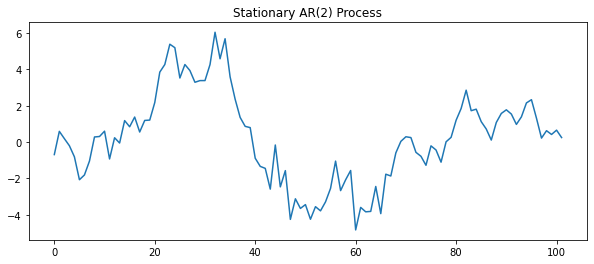

In [31]:
# the coefficients do sum up to 1 -> non-statinary, there are unit roots
ar_2_process = generate_ar_process(2,[.7,.3],100) 
plt.figure(figsize = (10,4))
plt.title('Stationary AR(2) Process')
plt.plot(ar_2_process)

In [32]:
perform_adf_test(ar_2_process)

ADF statistic: -1.9804176340018418
p-value: 0.29522473312525743


* We can also tell from the p-value that this is a non-stationary series